In [2]:
import PyCC
import numpy as np
import matplotlib.pyplot as plt
import PyCC.gpu_analysis as gpu_analysis

#plummer = PyCC.Distributions.Plummer(1000,1,1,1)
n = 100000
ys = []
xs = [1,10,25,50,75,100]
for r in xs:
    uniform = PyCC.Distributions.NFW(r,1,10,n)

    ray = PyCC.ray(np.array([1,0,0]),r*2,25)

    nsteps = 0

    outf4gpu,stats = PyCC.evaluate(uniform,steps=nsteps,dt=1,G=1,precision="f4",accelerate=True)
    print(stats)

    particles = outf4gpu.loc[:,["x","y","z"]].to_numpy().reshape(nsteps+1,n,3)
    masses = uniform.loc[:,"mass"].to_numpy()
    pos = ray.loc[:,["x","y","z"]].to_numpy()

    out,stats = gpu_analysis.evaluate(particles,masses,[0],pos)

    analytics = PyCC.Analytic.NFW(r,1,10,ray,1)
    summed = out.loc[:,"phi"].to_numpy()

    ys.append(np.mean((analytics-summed)[1:]))
    #plt.plot(PyCC.points2radius(ray),analytics)
    #plt.scatter(PyCC.points2radius(ray),summed)
    #plt.show()

/Users/humzaqureshi/Documents/GitHub/PyCC/PyCC/utilities.py:79: ComplexWarning: Casting complex values to real discards the imaginary part
  return float((-Rs/(W)) - Rs)


{'eval_time': 0.33382200000000006}


/Users/humzaqureshi/Documents/GitHub/PyCC/PyCC/utilities.py:79: ComplexWarning: Casting complex values to real discards the imaginary part
  return float((-Rs/(W)) - Rs)


{'eval_time': 0.2646801250000004}


/Users/humzaqureshi/Documents/GitHub/PyCC/PyCC/utilities.py:79: ComplexWarning: Casting complex values to real discards the imaginary part
  return float((-Rs/(W)) - Rs)


{'eval_time': 0.27186062499999997}


/Users/humzaqureshi/Documents/GitHub/PyCC/PyCC/utilities.py:79: ComplexWarning: Casting complex values to real discards the imaginary part
  return float((-Rs/(W)) - Rs)


{'eval_time': 0.2667865420000002}


/Users/humzaqureshi/Documents/GitHub/PyCC/PyCC/utilities.py:79: ComplexWarning: Casting complex values to real discards the imaginary part
  return float((-Rs/(W)) - Rs)


{'eval_time': 0.26613825}


/Users/humzaqureshi/Documents/GitHub/PyCC/PyCC/utilities.py:79: ComplexWarning: Casting complex values to real discards the imaginary part
  return float((-Rs/(W)) - Rs)


{'eval_time': 0.2657986250000004}


In [9]:
xs = np.array(xs)
ys = np.array(ys)

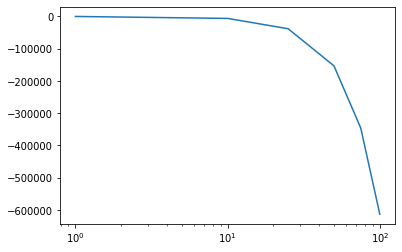

In [3]:
plt.plot(xs,ys)
plt.xscale('log')
plt.show()

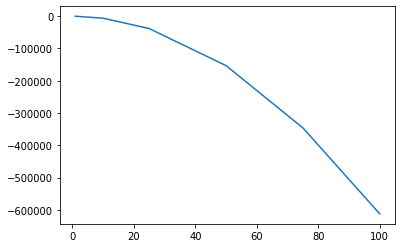

In [4]:
plt.plot(xs,ys)
plt.show()

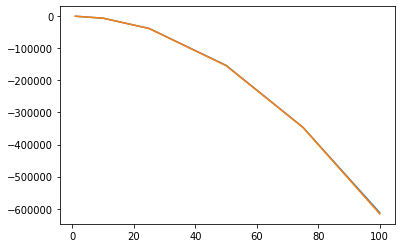

In [28]:
plt.plot(xs,ys)
plt.plot(xs,-((7.85*xs)**2))
plt.show()